University of Michigan - ROB 101 Computational Linear Algebra

# Homework 8.  Solutions of Non-Linear Equations
### Due: 11/18 at 9 PM Eastern

#### Purpose: Find roots of functions!
- Skills
    - Using algorithms to iteratively construct approximate solutions
    - Passing functions to functions
    - Learn to use the Bisection and Newton's methods for root-finding
    - Using the Jacobian and Gradient in the Newton-Raphson Algorithm
- Knowledge
    - Creating functions that work on vector form equations
    - Use linear approximations to find roots of functions
    
#### Task:
Complete and run the cells below as directed.

### Problem 1.  Bisection for root finding (2 Points) 
### a)  Translate the pseudocode below into code, and use it to find the root of f(x) near x=-4.0 (1 point)
 $$ f(x) = .2x^5 - 4x^3 + .7x + 2 $$

In [ ]:
# Run me don't change me
#f(x) is defined and plotted for you
f(x) = .2x.^5 - .4(x-5).^3 + .7(x +2) - 100
z(x) = 0
using Plots
p = plot(f, -5, 5)
plot!(z, -5, 5)

<img src = "https://i.postimg.cc/zB5TLDrQ/bisect-Pseudo.jpg" width = 700>

In [ ]:
# You will build your bisection algorithm here
#
#Look at the graph, then choose a pair a < b range that bracket the root near -4
#Note that you need a < b and the product f(a)f(b) < 0
#
# Remark: Typically, you want to bracket a single root, but you can bracket
# multiple roots as long as a < b and f(a)f(b) < 0 BOTH hold
a = 
b = 
#flag =1 is an indicator that we have found a root, xRoot is the root
flag = 0
xRoot = undef
#start a loop, compute c, and then update a or b accordingly.  
#If you find a zero (or approximate zero), mark the flag as true, store the root into xRoot, and exit the loop
fc=f((a+b)/2)
# your code here
throw(ErrorException())

#print out xRoot
[xRoot f(xRoot)]

In [ ]:
# Friendly self test
T1 = @assert abs(f(xRoot)) < 1e-8
println("all nothings means likely correct")
[T1]

In [ ]:
#autograder cell

### b)  Create a bisection function from your code above. (1 point)
Your function should take in a function, the range values a and b, and a tolerance.

In [ ]:
function my_bisect(f, a, b, aTol=1e-12)
    Flag = 0
    xRoot = undef
    #error checks: done for you
    if !(a < b)
        println("a is not strictly less than b")
        Flag=1
        return xRoot 
    end
    if !( f(a)*f(b) < 0)
        println("Fails test provided by the Intermediate Value Theorem")
        Flag=1
        return xRoot = false
    end
    if aTol < 1e-15
        println("tolerance is too tight")
        Flag=1
        return xRoot
    end
    
    #Add code here from 1a.  Also keep track of iterations this time
    k = 0  #use k to track iterations
    
    # your code here
    throw(ErrorException())
    
    println("iterated $k times")
    return xRoot
end

In [ ]:
#public autograder
println("all nothings means likely correct")
xRoot1 = my_bisect(f, -4, -3, 1E-5)
T1 = @assert isapprox(xRoot, xRoot1)
[T1]

In [ ]:
#autograder cell

### c)  Use your function to find the other two roots

In [ ]:
#output your answers as xRoot2 and xRoot3, in ascending order
# your code here
throw(ErrorException())

In [ ]:
#public autograder
println("all nothings means likely correct")
T1 = @assert (f(xRoot2) < 1e-8)
T2 = @assert (f(xRoot3) < 1e-8)
[T1 T2]

In [ ]:
#autograder cell

### Problem 2: Modified Bisection (1+1 Points)

The bisection algorithm is super simple and quite reliable. It sequenctially divides the bracketing region $[a~~ b]$ by half by defining $c=(a+b)/2$, and only uses the function values at $f(a)$ and $f(c)$ to determine which of the two ends of the bracket is to be updated. Newton's algorithm, on the other hand, uses additional information: the "slope" of the function at $c$,  to update the our next estimate of the root: $$x_{k+1} = x_{k}-h \frac{df(x_k)}{dx}$$ 

What we will do now is modify the Bisection Algorithm so that it too uses slope information. 

In [ ]:
# Run me, don't change me.
# I make an image to show how the algorithm works
using Plots
temp(x)=x^3 +x - 1
xline(x)=0
a=-2;b=2
pedagog=plot(temp,a,b, linewidht=2, legend=false)
plot!(xline, a, b, linewidth=3, color=:black)
m=(temp(b)-temp(a))/(b-a)
c=a-temp(a)/m
line(x)=temp(a) + m*(x-a)
xlabel!("x")
ylabel!("f(x)")
plot!(line,a,b, linewidth=3, color=:red)
scatter!([c],[0],markersize=6,color=:blue)
scatter!([a; b],[temp(a); temp(b)],markersize=4,color=:black, series_annotations = text.(["f(a)" ;"f(b)"], :bottom) )
display(pedagog)

A picture of how the algorthm works is shown above.  The blue line is a function f(x). What we do is connect the point $[a, f(a)]$ with the point $[b, f(b)]$ with a straight line(red). The line is then defined by
$$ y(x)= f(a) + m (x-a), $$
where the slope is $m = \frac{f(b)-f(a)}{b-a}$.
We then solve for the interesction of the line with the $x$-axis, to find $c$, so that $c=a - f(a)/m$. The decision on whether to update $a$ or $b$ is still made based on whether $f(a)$ and $f(c)$ are of the same or different signs.  If they are of opposite signs, then we set $b = c$.  If they are of the same signs, we set $a = c$.

### a)  Write the modified bisection function. (1 point)
Your function should take in a function, a and b values to represent the range, and a tolerance.

In [ ]:
function mod_bisect(f, a, b, aTol=1e-12)  
    #you can reuse your code from the regular bisection algorithm, just be sure to change the computation of c
    
    # your code here
    throw(ErrorException())
end

In [ ]:
#public autograder
println("all nothings means likely correct")
@show xRootb1 = mod_bisect(f, -4, -3, 1E-9)
@show xRootb2 = mod_bisect(f, -2, 0, 1E-9)
@show xRootb3 = mod_bisect(f, 2, 4, 1E-9)

T1 = @assert f(xRootb1) < 1e-8
T2 = @assert f(xRootb2) < 1e-8
T3 = @assert f(xRootb3) < 1e-8

[T1 T2 T3]

In [ ]:
#autograder cell

### b)  Compare your results from running the regular and modified algorithms on f(x)  (1 point)
Did you get the same answer?  Did it take the same number of iterations?  If not, which method was faster?

YOUR ANSWER HERE

### Problem 3: Newton's Algorithm (1+1+1 Points)


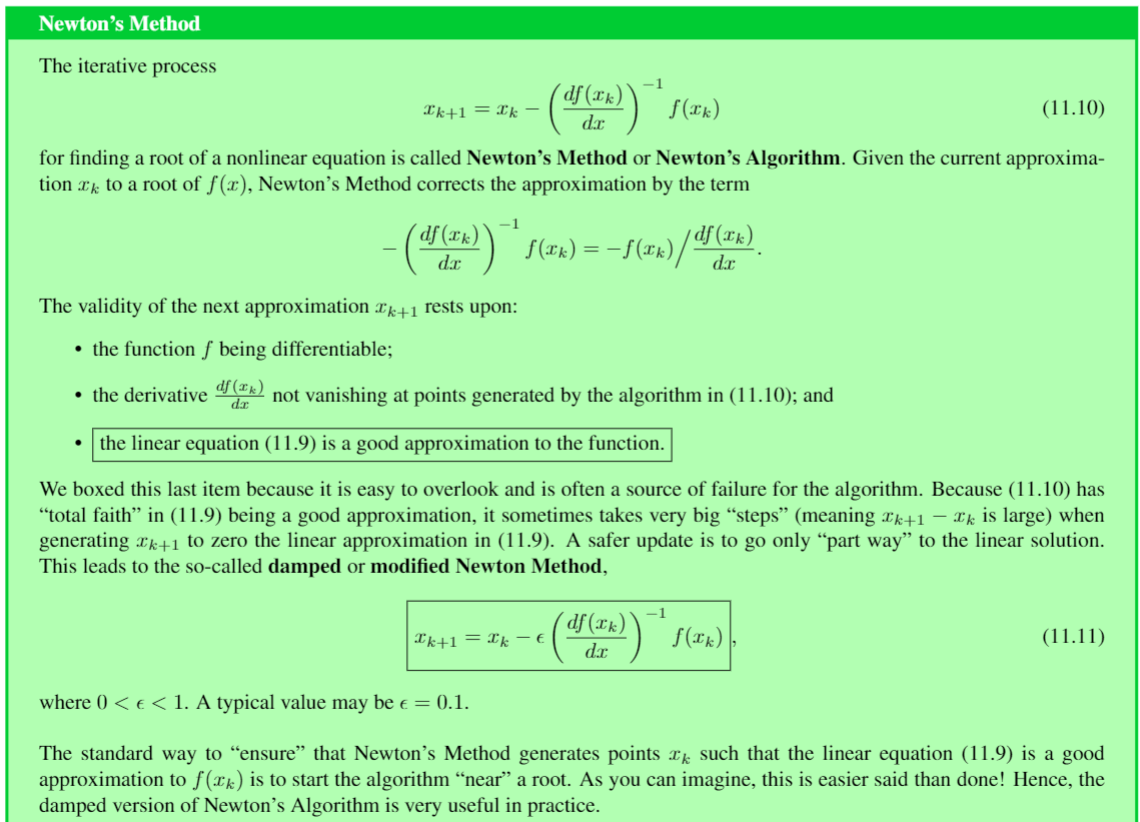

### a)  Write Newton's Algorithm into a function. (1 point)
Your Function should take in:
- a function to work on
- an estimate of the solution
- an h value 
- a character that indicates symmetric, forward or backward ('s', 'f', or 'b')
- a tolerance

A reminder on Forward, Backward and Symmetric Difference:
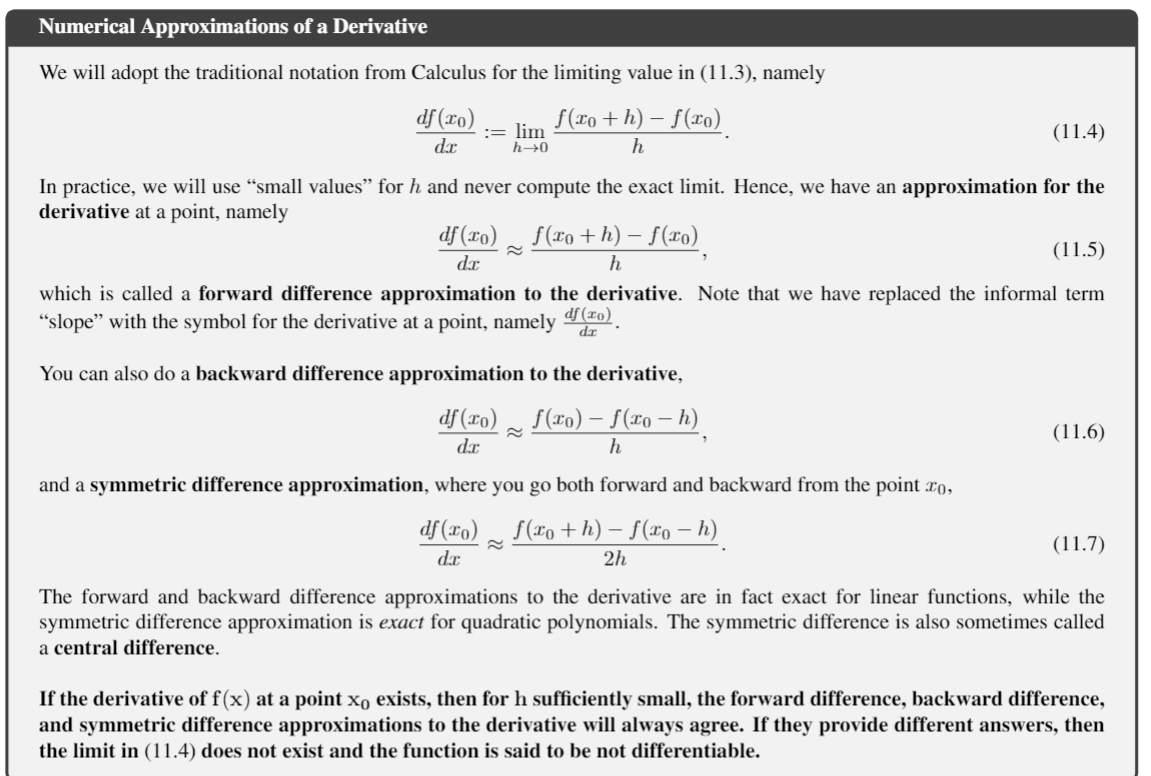

In [ ]:
#Build the function in this cell
function newtons_algorithm(f, x0, h, diffType, aTol=1e-12)
    flag = 0;  # to keep track of if we are close enough
    k = 0; #keeps track of iterations
    x = x0;
    while (flag == 0) & (k<1E4)
        #first, compute df depending on which type of difference was indicated
        # your code here
        throw(ErrorException())
        
        @show x = x - f(x)/df
        
        #now, check to see if f(x) is close enough to zero, based on the tolerance value input
        #if so, change the flag value to a nonzero value
        # your code here
        throw(ErrorException())
        
        k += 1
    end
    print("Iterated $k times")
    return x
end

In [ ]:
#A reminder of what function you are working on (so you don't have to scroll up)
f(x) = .2x.^5 - .4(x-5).^3 + .7(x +2) - 100

In [ ]:
#public autograder
println("all nothings means likely correct")
ans3a = newtons_algorithm(f, -3.8, 1E-3,'s',1E-9)
T1 = @assert f(ans3a) < 1e-8
[T1]

In [ ]:
#autograder cell

### b) Compare the results of using forward, backward and symmetric differences in Newton's Method (1 point)
Use the code block below to experiment.  Which method is the fastest for finding roots of f(x)?  Do any of the methods fail?  Explain why.

YOUR ANSWER HERE


In [ ]:
#use this cell to test 's' 'b' and 'f' difference methods on Newton's method
#use @show to display output of multiple lines (not just the last line)


### c) Out of all the methods used so far to solve for roots of f(x), which one was the best? (1 point)
Take into account speed (number of iterations), accuracy, and if any methods caused an error.
Explain your reasoning.

YOUR ANSWER HERE


### The Newton-Raphson Algorithm

The algorithms you just wrote unfortunately only work for single-variable equations. In an equation with multiple independent variables, there are many "slopes" between two points, because there are multiple dimensions along which to compute the slopes. Consider a function $f:R^2 \to R^2$, where 
$$ \begin{bmatrix}z_1 \\ z_2 \end{bmatrix} = \begin{bmatrix}f_1(x,y) \\ f_2(x,y) \end{bmatrix}:=\begin{bmatrix}ax + by \\ cx + dy \end{bmatrix}$$
There are now two independent rates of change: the change in $z_1$ with respect to x, and the change in $z_1$ with respect to y. But wait, there's more! You can't find the roots with $f_1$ alone, the places where $z_1$ is 0, because now you have 2 independent variables! We also need to use $f_2$ and compute the change in $z_2$ with respect to x, and the change in $z_2$ with respect to y.  

To do this, we need a new tool to define the rates of change (derivatives) of a vector-valued function, and a new algortihm to use those derivatives to find the roots. And so, we have the Jacobian and the Newton-Raphson Algorithm.

### Problem 4: The Jacobian of a function (1+1+2 Points)
The Jacobian of a function f(x) is computed as follows:
$$\mathbf J = \begin{bmatrix}
    \dfrac{\partial \mathbf{f}}{\partial x_1} & \cdots & \dfrac{\partial \mathbf{f}}{\partial x_n} \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial f_m}{\partial x_1} & \cdots & \dfrac{\partial f_m}{\partial x_n} \end{bmatrix}$$
    
#### Below is an example from our textbook of how the Jacobian is calculated with the symmetric difference method

In [ ]:
F(x1,x2,x3)=[x1*x2*x3; log(2+cos(x1)) + x2^x1; x1*x3/(1 + x2^2)]
h=0.01
x0=[pi;1.0;2.0]
dfdx1 =(F(x0[1]+h,x0[2],x0[3])-F(x0[1]-h,x0[2],x0[3]))/(2*h)
dfdx2 =(F(x0[1],x0[2]+h,x0[3])-F(x0[1],x0[2]-h,x0[3]))/(2*h)
dfdx3 =(F(x0[1],x0[2],x0[3]+h)-F(x0[1],x0[2],x0[3]-h))/(2*h)
dfdx_Ans=[dfdx1 dfdx2 dfdx3]

### a)  Rewrite the function F in vector form (1 point)
Convert F(x1, x2, x3) into the form Fvect(x)  where x is a vector $\left[x1, x2, x3\right]$

**Hint 1:**  to access x1, you would need to index into x with $x[1]$

**Hint 2:** suppose g(x1,x2)=x1^2*sin(x2), then we can vectorize the function via
Gvect(x)=x[1]^2*sin(x[2])

In [ ]:
#rewrite function F from above in vector form.  Call it Fvect
# your code here
throw(ErrorException())

In [ ]:
#autograder cell
using Random
Random.seed!(142)
x = 10*randn(3)
x1 = x[1]; x2 = x[2]; x3 = x[3];
@show regF = F(x1, x2, x3)
@show vectF = Fvect(x)

### b)  Write a function that uses symmetric differences to compute the Jacobian for a square function of n terms (1 point)
Your function should take in:
- a function of n-terms (written in vector form)
- an h value
- a point on the surface at which to compute the Jacobian

And should return:
- a n by n Jacobian matrix

**Hint:** Our previous example (copied below for convenience), calulates each column of dfdx one at a time.  Think about how you can automate that with this with For Loop.

```
F(x1,x2,x3)=[x1.*x2.*x3; log.(2+cos.(x1)) .+ x2.^x1; x1.*x3/(1 .+ x2.^2)]
h=0.01
x0=[pi;1.0;2.0]
dfdx1 =(F(x0[1]+h,x0[2],x0[3])-F(x0[1]-h,x0[2],x0[3]))/(2*h)
dfdx2 =(F(x0[1],x0[2]+h,x0[3])-F(x0[1],x0[2]-h,x0[3]))/(2*h)
dfdx3 =(F(x0[1],x0[2],x0[3]+h)-F(x0[1],x0[2],x0[3]-h))/(2*h)
dfdx_Ans=[dfdx1 dfdx2 dfdx3]
```

In [ ]:
function my_jacobian(F, h, x0)
    #assume that x0 and F are size compatible
    n = length(x0)
    dfdx = Array{Float64}(undef, n, n)  #blank array of the correct size
    for i in 1:n
        #compute and store each column of dfdx.  
        # your code here
        throw(ErrorException())
        
    end
    return dfdx
end

In [ ]:
ans4b = my_jacobian(Fvect, 0.01, [pi;1.0;2.0])
#check that your output from this cell is the same as from the example cell

### c)  Use your Jacobian function to find the Jacobian of g(a, b, c, d, x, y, z)  (2 points)

 $$ g(a, b, c, d, x, y, z) =  \left[ \begin{array}\ a^2 - 6bz + cx^3 +a - d\\ abc + xd^2\\ a^3 - 2b + c\\ ab^2 - ba^2\\ b^3 + 4c + xad + 2y\\a^4\\ dc^2 - 3a -b\end{array} \right]$$
 
 
Compute the Jacobian matrix when **a = 1, b = pi, c = -2, d = 0.8, x = -pi, y = -0.9, z = 4**

In [ ]:
#first, you must declare your function g() in vector form
#enclose the entire thing in square braces[] and separate rows with semicolons ;
# your code here
throw(ErrorException())

In [ ]:
#make sure that sol4c is the same as ans4c.  If it isn't, double check your declaration of g
@show sol4c = g([1; 2; 3; 4; 5; 6; 7])
ans4c = [289; 86; 0; 2; 52; 1; 31]

In [ ]:
#now take the Jacobian for the designated point
#Use a step size of 1E-3
#declare your v0 first

#store your answer in a variable ans4d
# your code here
throw(ErrorException())

In [ ]:
#public autograder
println("all nothings means likely correct")
T1 = @assert isapprox(sum(ans4d), -98.17809, atol = 1e-3)
[T1]

In [ ]:
#autograder cell

### Problem 5: Newton-Raphson Algorithm with the Jacobian (2+1+1 Points)
Essentially, the Newton-Raphson method is a vector version of Newton's Algorithm.


### a)  Build a Newton-Raphson function (2 points)
Your function should take in:
- a function
- an estimate of the root/solution
- a step size
- a tolerance

You may use either an LU or QR factorization to solve for $\Delta x_k$ in (11.45). Both are built into the Linear Algebra package.  Forward and back substitution functions are provided.

In [ ]:
using LinearAlgebra
function newton_raphson(F, x0, h, tol)
    #fill in the function!  Return the root from your function
    #be sure to also keep track of the iterations it took for the root to converge
    #Hint:  Look to earlier functions for strucuring help
    # your code here
    throw(ErrorException())
    
end


In [ ]:
##Forward and Back substitution functions from HW04

#This is a back substitution function.  It solves for x in an equation Ux = b, where U is upper triangular.
function backwardsub(U, b)
    n = length(b)
    x = Vector{Float64}(undef, n) 
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        x[i]=(b[i]- (U[i,(i+1):n])' *x[(i+1):n] )./U[i,i]
    end
    return x
end
#This is a forward substitution function
function forwardsub(L, b)
    n = length(b)
    x = Vector{Float64}(undef, n); 
    x[1] = b[1]/L[1,1] 
    for i = 2:n 
        x[i]=(b[i]- (L[i,1:i-1])' *x[1:i-1] )./L[i,i] 
    end
    return x
end

### b)  Run your Newton-Raphson function on r(x).  Choose an appropriate xZero so that you don't get "NaN" values (1 point)
With Regular Newton's method, you could look at a graph to make your estimate.  However, when faced with a vector valued function or a function beyond 3 dimensions, visualization with plots is difficult or impossible.  You must choose your estimates without the visual aid.

Hint:  You can either guess and check here, or you can estimate a root to r(x) by hand with algebra.

In [ ]:
#r is declared for you
r(x) = [x[1]^3 + 4*x[2]^2 - 3; 3*x[2] - x[1]^2 + 2]

In [ ]:
#first choose your estimate of the root, then solve
#return your answer as ans5b
# your code here
throw(ErrorException())

In [ ]:
#public autograder
println("all nothings means likely correct")
T1 = @assert isapprox(sum(r(ans5b)), 0, atol = 1e-8)
[T1]

In [ ]:
#autograder cell

### c)  Run Newton-Raphson on this example problem from your textbook.  Then, try changing the tolerance and the starting point.  (1 point)
$$F(x)=\left[\begin{array}{c}
   x_1 + 2 x_2 - x_1 (x_1 + 4 x_2) - x_2 (4 x_1 + 10 x_2) + 3  \\
 3 x_1 + 4 x_2 - x_1 (x_1 + 4 x_2) - x_2 (4 x_1 + 10 x_2) + 4  \\
                                0.5 \cos(x_1) + x_3 -\left( \sin(x_3) \right)^7  \\
                              -  2(x_2)^2  \sin(x_1) + (x_4)^3
\end{array} \right]
$$

### Which parameter changes the results the most?  Is there a definite range of starting points where the function will no longer work?

YOUR ANSWER HERE

In [ ]:
#the function is declared for you!  phew
fTest(x) = [(x[1] + 2x[2] - x[1]*(x[1]+4x[2]) - x[2]*(4x[1]+10x[2]) +3);
(3x[1] + 4x[2] - x[1]*(x[1]+4x[2]) - x[2]*(4x[1]+10x[2]) +4);
(0.5cos(x[1]) + x[3] - (sin(x[3])).^7);
(-2(x[2]^2)*sin(x[1]) + x[4]^3)]

In [ ]:
# This should produce the same results as Example 11.9 in your textbook
x0 = [-2, 3, pi, -1]
myTol = 1E-4
textbookEx = newton_raphson(fTest, x0, 0.1, myTol)

In [ ]:
#public autograder
println("all nothings means likely correct")
T1 = @assert isapprox(textbookEx, [-2.2595730873836666; 1.7595730873836664; 0.31808933111096444; -1.6845807137029898])
[T1]